In [11]:
# imports
import scipy
#import xarray

import panel as pn
#pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from pandas_profiling import ProfileReport
import seaborn as sns
import sweetviz
import dtale
%matplotlib inline

In [12]:
file_path = Path("./Data")
imdb_data = pd.read_csv(f"{file_path}/movie_metadata.csv",parse_dates=True, encoding= 'unicode_escape')
annual_ticket_sales = pd.read_csv(f"{file_path}/AnnualTicketSales.csv",parse_dates=True)
highest_grossers = pd.read_csv(f"{file_path}/HighestGrossers.csv",parse_dates=True)
popular_creative_types = pd.read_csv(f"{file_path}/PopularCreativeTypes.csv",parse_dates=True)
top_distributors = pd.read_csv(f"{file_path}/TopDistributors.csv",parse_dates=True)
top_genres = pd.read_csv(f"{file_path}/TopGenres.csv",parse_dates=True)
top_grossing_ratings = pd.read_csv(f"{file_path}/TopGrossingRatings.csv",parse_dates=True)
top_grossing_sources = pd.read_csv(f"{file_path}/TopGrossingSources.csv",parse_dates=True)
top_production_methods = pd.read_csv(f"{file_path}/TopProductionMethods.csv",parse_dates=True)
wide_release_count = pd.read_csv(f"{file_path}/WideReleasesCount.csv",parse_dates=True)
imdb_top_1000 = pd.read_csv(f"{file_path}/imdb_top_1000.csv",parse_dates=True, encoding= 'unicode_escape')
imdb_data.reset_index()
imdb_data.head()

,ï»¿color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [13]:
highest_grossers_copy=highest_grossers

In [14]:
highest_grossers_copy

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,"4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,"6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,"5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,"9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,"8,47,32,942"
5,2000,How the Grinch Stole Christmas,Adventure,PG,Universal,253367455,430583644,"4,70,06,948"
6,2001,Harry Potter and the Sorcerer’s Stone,Adventure,PG,Warner Bros.,300404434,486166890,"5,30,74,988"
7,2002,Spider-Man,Adventure,PG-13,Sony Pictures,403706375,636480273,"6,94,84,746"
8,2003,Finding Nemo,Adventure,G,Walt Disney,339714367,516050346,"5,63,37,374"
9,2004,Shrek 2,Adventure,PG,Dreamworks SKG,441226247,650826473,"7,10,50,925"


<AxesSubplot:title={'center':'Highest Grossers'}, xlabel='MOVIE'>

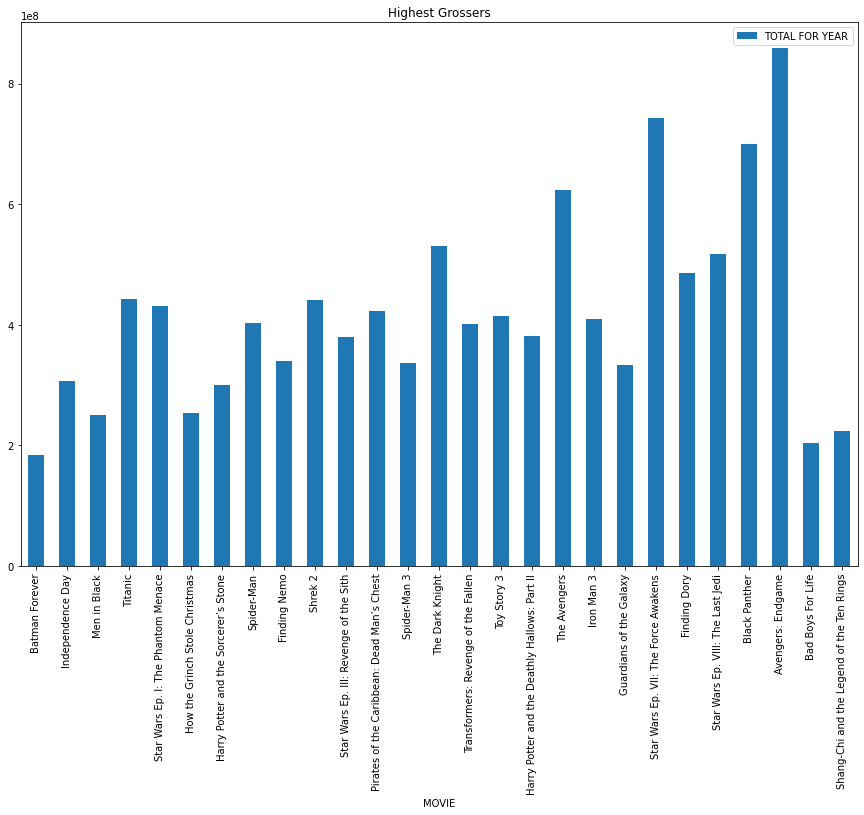

In [15]:
highest_grossers_copy.plot.bar(figsize=(15,10), x='MOVIE', y='TOTAL FOR YEAR', title='Highest Grossers')

In [16]:
#Cleaning the data

In [17]:
#Remove duplicates
imdb_data_copy=imdb_data.drop_duplicates()

In [18]:
# Checking for null
imdb_data_copy.isnull()

,ï»¿color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [19]:
#Dropna
imdb_data_copy.dropna(inplace=True)
imdb_data_copy

,ï»¿color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Batrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [20]:
imdb_data_copy=imdb_data_copy[imdb_data_copy.index.notnull()].reset_index()

In [21]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ï»¿color                   5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [22]:
# Drop unnecessary columns
imdb_data_copy.drop(columns=['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'genres', 'actor_1_name', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'budget', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes' ], inplace=True)
imdb_data_copy.head()

,index,ï»¿color,director_name,num_critic_for_reviews,gross,movie_title,num_voted_users,num_user_for_reviews,content_rating,title_year,imdb_score
0,0,Color,James Cameron,723.0,760505847.0,Avatar,886204,3054.0,PG-13,2009.0,7.9
1,1,Color,Gore Verbinski,302.0,309404152.0,Pirates of the Caribbean: At World's End,471220,1238.0,PG-13,2007.0,7.1
2,2,Color,Sam Mendes,602.0,200074175.0,Spectre,275868,994.0,PG-13,2015.0,6.8
3,3,Color,Christopher Nolan,813.0,448130642.0,The Dark Knight Rises,1144337,2701.0,PG-13,2012.0,8.5
4,5,Color,Andrew Stanton,462.0,73058679.0,John Carter,212204,738.0,PG-13,2012.0,6.6


In [23]:
# Set the date as the index to the DataFrame
imdb_data_copy = imdb_data.set_index('title_year')
imdb_data_copy.head()

,ï»¿color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,,,,,,,
2009.0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,936.0,7.9,1.78,33000
2007.0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,5000.0,7.1,2.35,0
2015.0,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,393.0,6.8,2.35,85000
2012.0,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,23000.0,8.5,2.35,164000
NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [24]:
# Sort ascending (default)
imdb_data_copy.sort_values("gross")

,ï»¿color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
title_year,,,,,,,,,,,,,,,,,,,,,
2014.0,Color,Ekachai Uekrongtham,66.0,96.0,3.0,305.0,Mike Dopud,2000.0,162.0,Action|Crime|Thriller,...,http://www.imdb.com/title/tt1641841/?ref_=fn_t...,38.0,English,Thailand,R,9000000.0,368.0,5.7,2.35,0
2001.0,Color,Frank Whaley,9.0,96.0,436.0,4.0,Frank Whaley,474.0,703.0,Comedy|Drama,...,http://www.imdb.com/title/tt0271020/?ref_=fn_t...,21.0,English,USA,R,1500000.0,436.0,5.4,1.85,47
2006.0,Color,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,Mariel Hemingway,563.0,721.0,Action|Drama,...,http://www.imdb.com/title/tt0487156/?ref_=fn_t...,12.0,English,Germany,R,1000000.0,288.0,4.1,1.85,42
2006.0,Color,Robert Sarkies,43.0,100.0,0.0,3.0,Matthew Sunderland,109.0,728.0,Crime|Drama,...,http://www.imdb.com/title/tt0839938/?ref_=fn_t...,22.0,English,New Zealand,NaN,NaN,10.0,7.3,1.85,285
2009.0,Color,Ian Fitzgibbon,54.0,88.0,11.0,415.0,Brendan Coyle,1000.0,828.0,Action|Comedy|Crime|Drama|Romance|Thriller,...,http://www.imdb.com/title/tt1003034/?ref_=fn_t...,31.0,English,Ireland,R,NaN,418.0,6.4,2.35,663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995.0,Color,Ash Baron-Cohen,10.0,98.0,3.0,152.0,Stanley B. Herman,789.0,NaN,Crime|Drama,...,http://www.imdb.com/title/tt0109266/?ref_=fn_t...,14.0,English,USA,NaN,NaN,194.0,6.4,NaN,20
2005.0,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,1.0,English,USA,PG-13,3250.0,44.0,7.8,NaN,4
2013.0,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,470.0,7.7,NaN,84


In [25]:
# Group by `director name` and perform count
imdb_data_copy.groupby('director_name').count()


,ï»¿color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
director_name,,,,,,,,,,,,,,,,,,,,,
A. Raven Cruz,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Aaron Hann,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,0,1,1,0,1
Aaron Schneider,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Aaron Seltzer,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Abel Ferrara,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoran Lisinac,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
mile Gaudreault,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ric Tessier,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1


In [26]:
imdb_top_1000_copy=imdb_top_1000

In [27]:
imdb_top_1000_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [28]:
imdb_top_1000_copy.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


In [29]:
imdb_top_1000_copy.drop(columns=['Poster_Link', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Star2', 'Star3', 'Star4'], inplace=True)
imdb_top_1000_copy.head()

,Series_Title,Released_Year,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross
0,The Shawshank Redemption,1994,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,The Godfather,1972,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,The Dark Knight,2008,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,The Godfather: Part II,1974,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,12 Angry Men,1957,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [30]:
# Sort ascending (default)
mdb_top_1000_copy = imdb_top_1000.sort_values('Gross', ascending=False).groupby('Director').head(3).sort_index()
imdb_top_1000_copy.sort_values('Director')

,Series_Title,Released_Year,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross
65,Taare Zameen Par,2007,8.4,NaN,Aamir Khan,Amole Gupte,168895,1223869.0
612,The Trial of the Chicago 7,2020,7.8,77.0,Aaron Sorkin,Eddie Redmayne,89896,NaN
734,La vie d'Adle,2013,7.7,89.0,Abdellatif Kechiche,La Seydoux,138741,2199675.0
577,Udta Punjab,2016,7.8,NaN,Abhishek Chaubey,Shahid Kapoor,27175,NaN
735,Kai po che!,2013,7.7,40.0,Abhishek Kapoor,Amit Sadh,32628,1122527.0
...,...,...,...,...,...,...,...,...
138,Mandariinid,2013,8.2,73.0,Zaza Urushadze,Lembit Ulfsak,40382,144501.0
334,Gully Boy,2019,8.0,65.0,Zoya Akhtar,Vijay Varma,31886,5566534.0
221,Zindagi Na Milegi Dobara,2011,8.1,NaN,Zoya Akhtar,Hrithik Roshan,67927,3108485.0
92,Babam ve Oglum,2005,8.3,NaN,agan Irmak,etin Tekindor,78925,NaN


In [32]:
imdb_top_1000_copy.hvplot.bar(x='Released_Year', y='Gross', by='Series_Title', stacked=True, groupby='Director', height=500, rot=90).opts(yformatter="%.0f")


:DynamicMap   [Director]
   :Bars   [Released_Year,Series_Title]   (Gross)

In [33]:
imdb_data.hvplot.bar(x='title_year', y='gross', by='movie_title', stacked=True, groupby='director_name', height=500, rot=45).opts(yformatter="%.0f")


:DynamicMap   [director_name]
   :Bars   [title_year,movie_title]   (gross)

In [34]:
imdb_data.hvplot.hist(y='imdb_score')

:Histogram   [imdb_score]   (imdb_score_count)

In [35]:
imdb_data.hvplot.bar(x='imdb_score', y='gross', by='movie_title', stacked=True, groupby='director_name', height=500, rot=90).opts(yformatter="%.0f")


:DynamicMap   [director_name]
   :Bars   [imdb_score,movie_title]   (gross)

In [36]:
imdb_data.hvplot.bar(x='imdb_score', y='', by='movie_title', stacked=True, groupby='director_name', height=500, rot=90).opts(yformatter="%.0f")


:DynamicMap   [director_name]
   :Bars   [imdb_score,movie_title]   (num_critic_for_reviews)

In [37]:
imdb_top_1000_copy.hvplot.scatter(x='IMDB_Rating', y='Gross', c='Released_Year').opts(yformatter="%.0f")

:Scatter   [IMDB_Rating]   (Gross,Released_Year)

In [38]:
imdb_top_1000_copy.hvplot.scatter(x='Meta_score', y='Gross', c='Released_Year').opts(yformatter="%.0f")

:Scatter   [Meta_score]   (Gross,Released_Year)

In [39]:
imdb_data.hvplot.scatter(x='imdb_score', y='gross', c='title_year').opts(yformatter="%.0f")


:Scatter   [imdb_score]   (gross,title_year)

In [40]:
imdb_data_copy.hvplot.hexbin(x='imdb_score', y='gross', width=600, height=500, logz=True).opts(yformatter="%.0f")


:HexTiles   [imdb_score,gross]

In [41]:
imdb_top_1000_copy.hvplot.hexbin(x='IMDB_Rating', y='Gross', width=600, height=500, logz=True).opts(yformatter="%.0f")


:HexTiles   [IMDB_Rating,Gross]

In [42]:
imdb_top_1000_copy.hvplot.hexbin(x='Meta_score', y='Gross', width=600, height=500, logz=True).opts(yformatter="%.0f")

:HexTiles   [Meta_score,Gross]

In [43]:
imdb_data_copy.hvplot.hexbin(x='imdb_score', y='num_critic_for_reviews', width=600, height=500, logz=True).opts(yformatter="%.0f")

:HexTiles   [imdb_score,num_critic_for_reviews]

In [44]:
imdb_top_1000_copyt=dtale.show(imdb_top_1000)
imdb_top_1000_copy

,Series_Title,Released_Year,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross
0,The Shawshank Redemption,1994,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,The Godfather,1972,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,The Dark Knight,2008,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,The Godfather: Part II,1974,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,12 Angry Men,1957,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0
...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,7.6,76.0,Blake Edwards,Audrey Hepburn,166544,NaN
996,Giant,1956,7.6,84.0,George Stevens,Elizabeth Taylor,34075,NaN
997,From Here to Eternity,1953,7.6,85.0,Fred Zinnemann,Burt Lancaster,43374,30500000.0
998,Lifeboat,1944,7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,26471,NaN


                                             |                                             | [  0%]   00:00 ->…


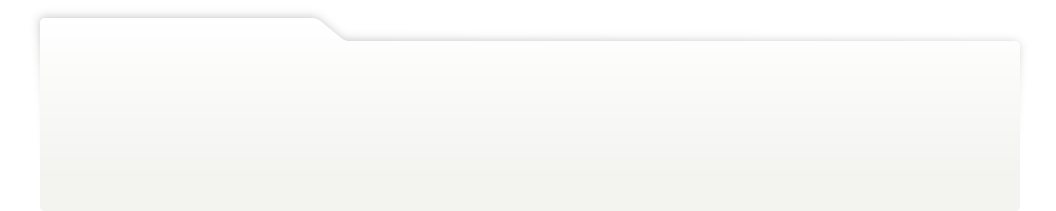
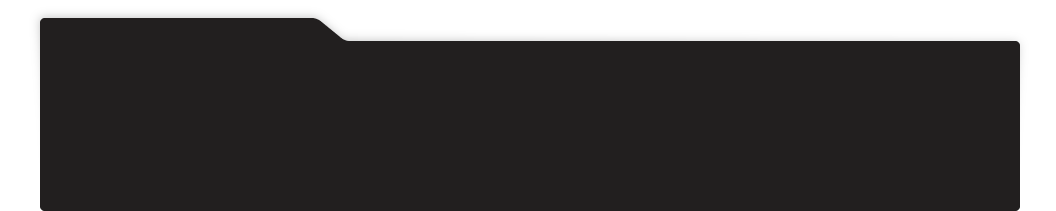
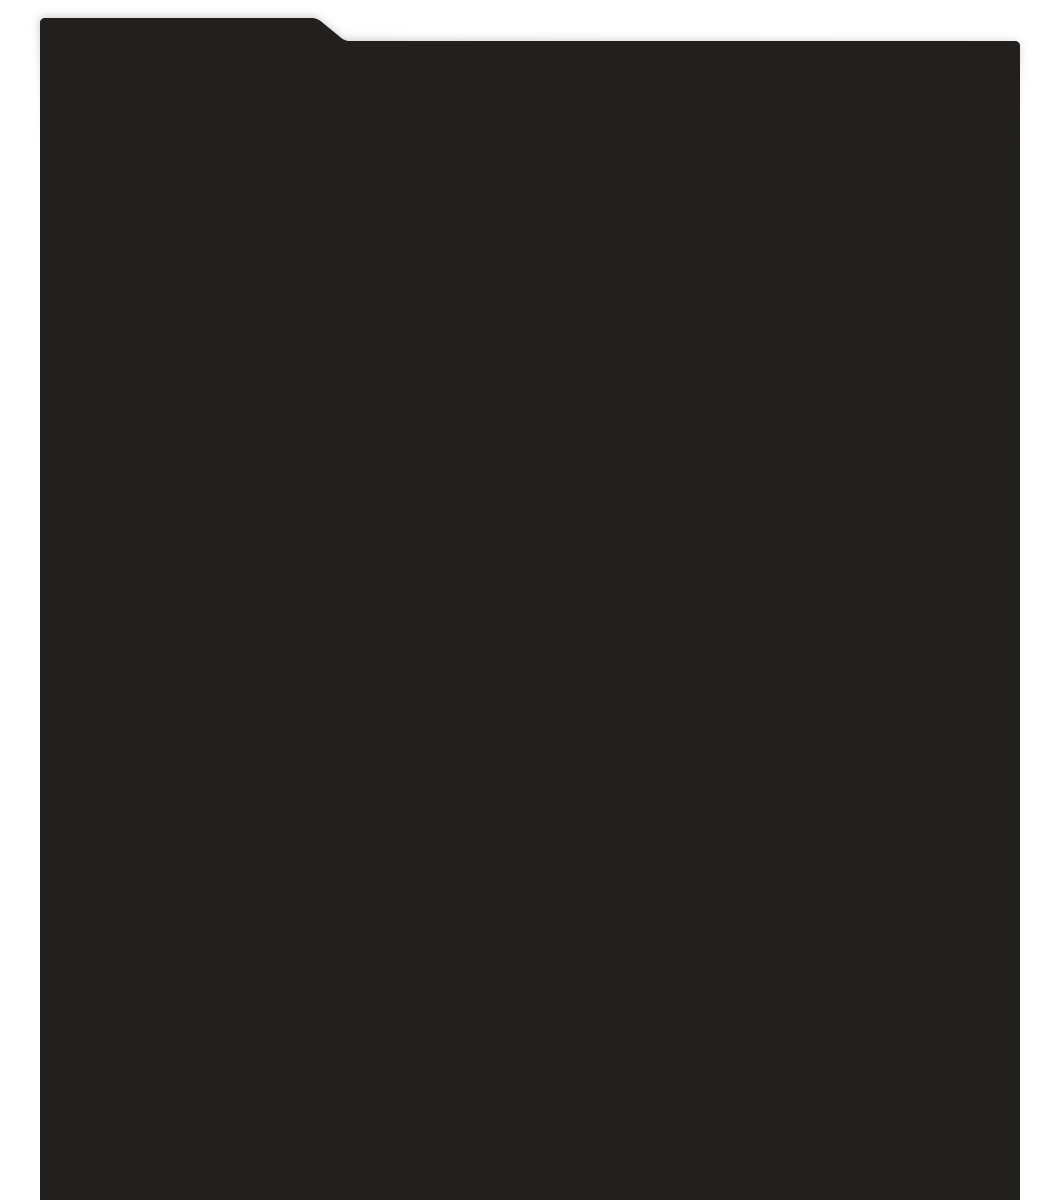
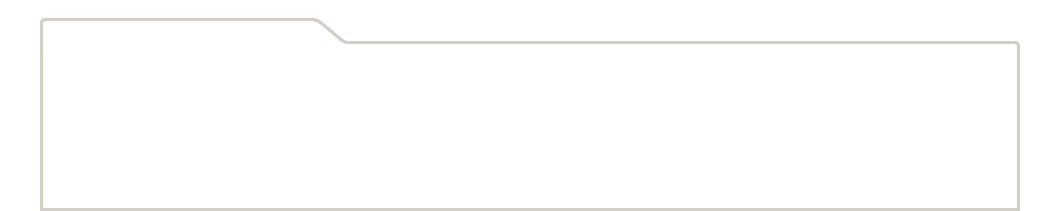
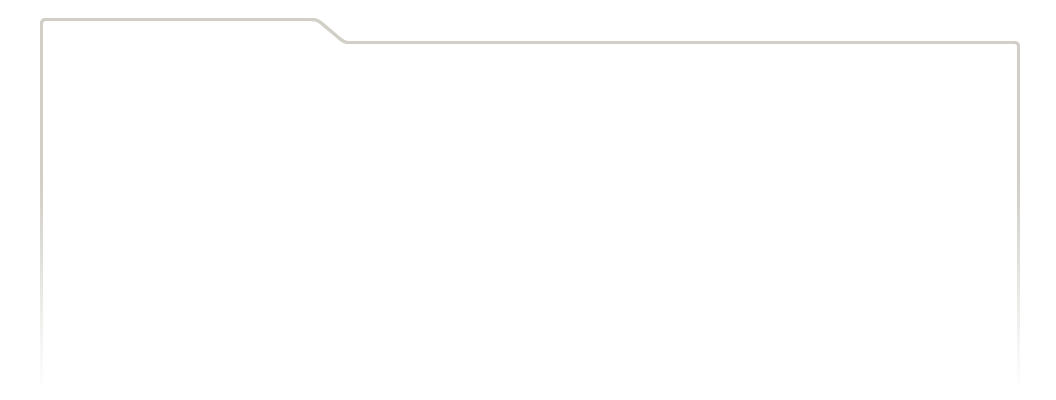
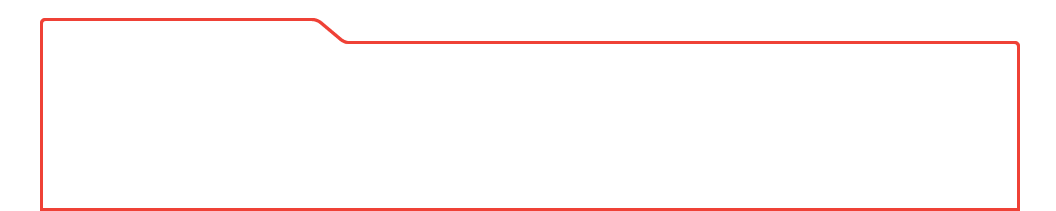
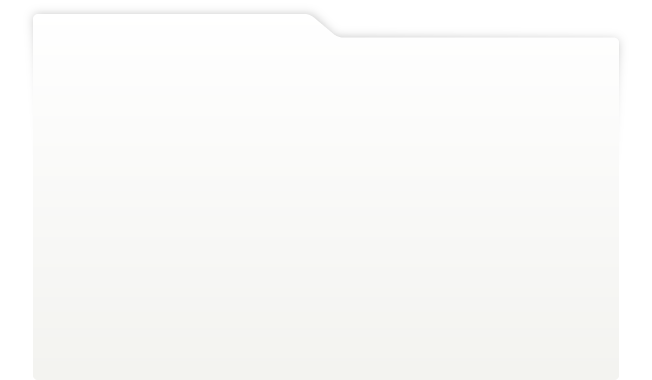
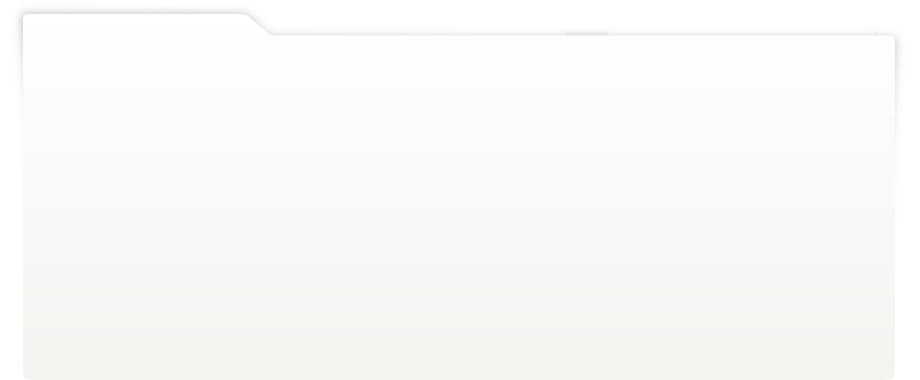
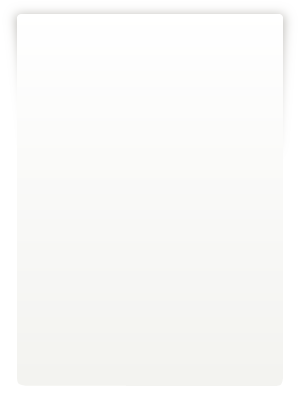
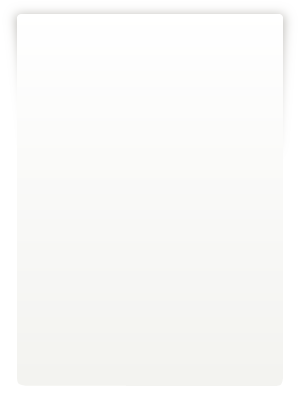
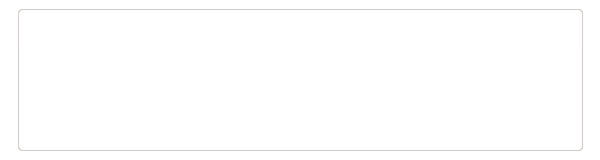
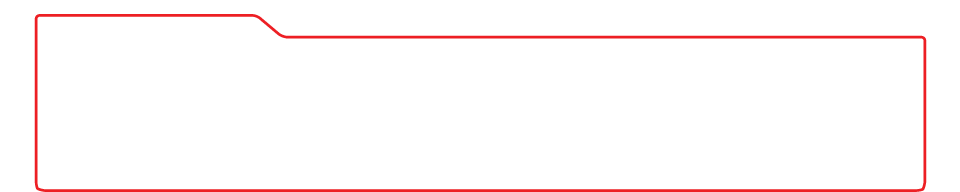
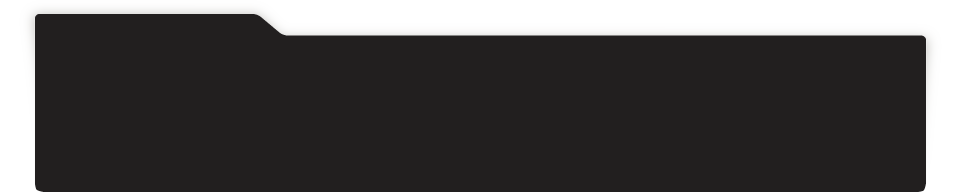
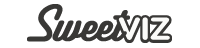
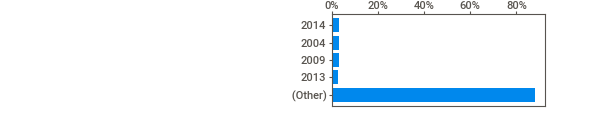
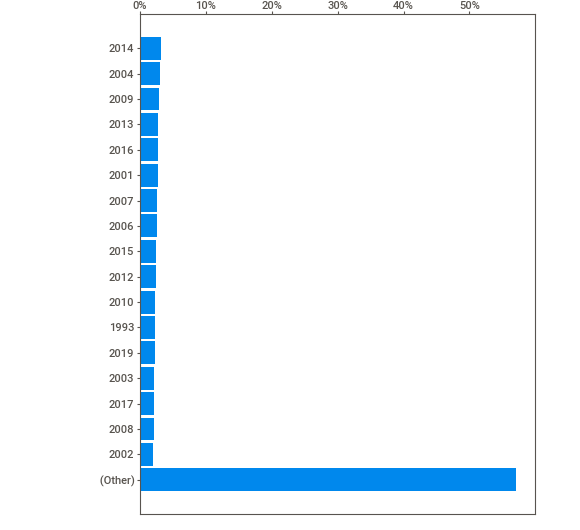
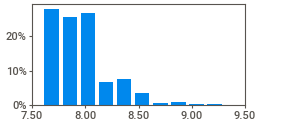
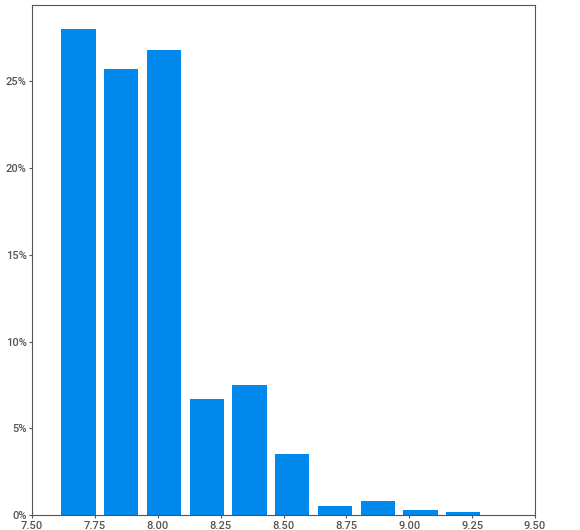
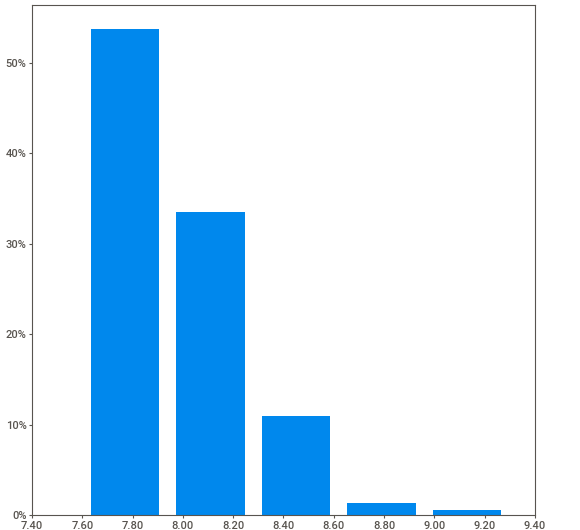
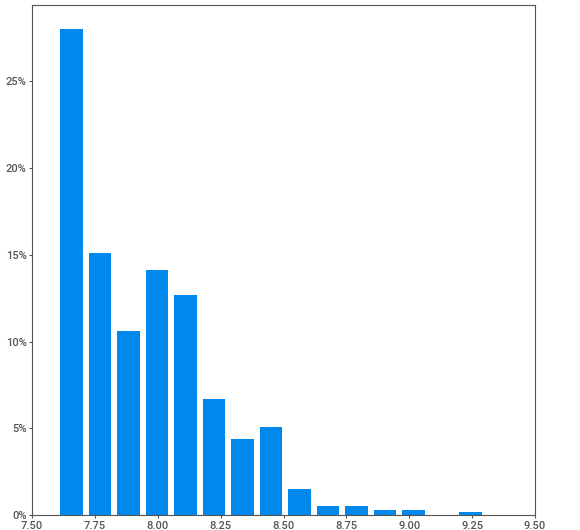
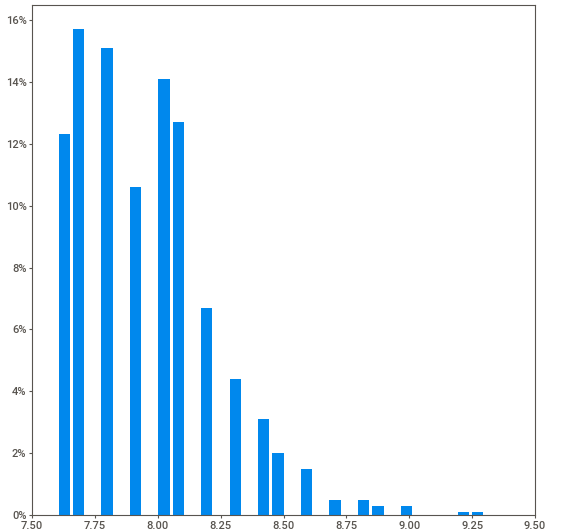
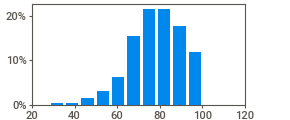
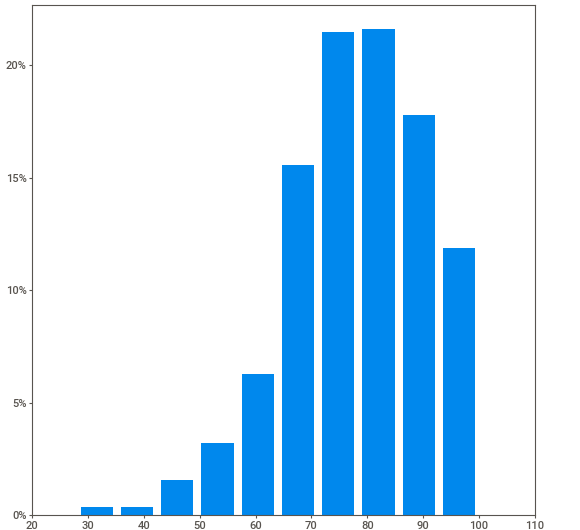
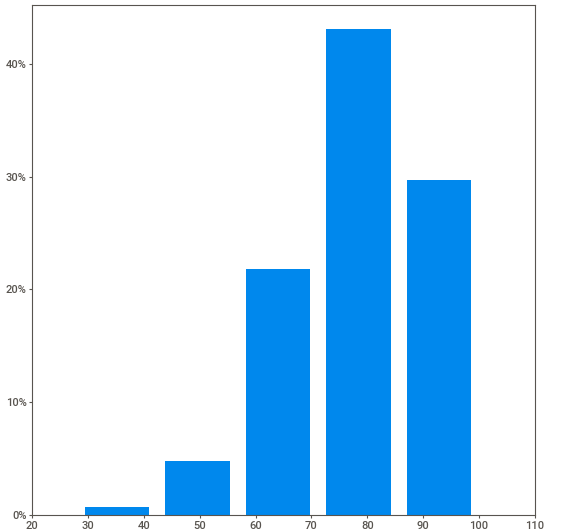
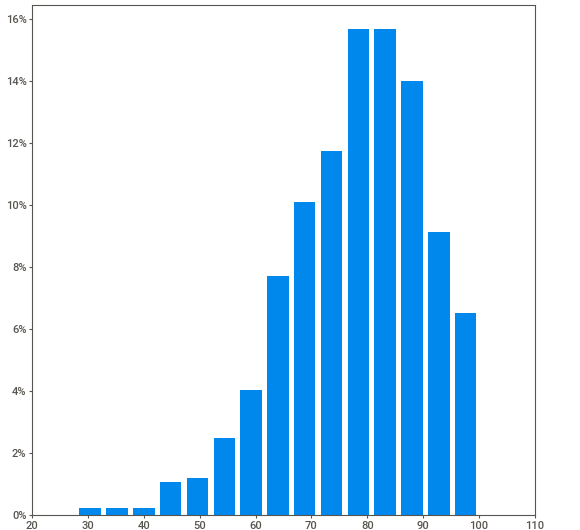
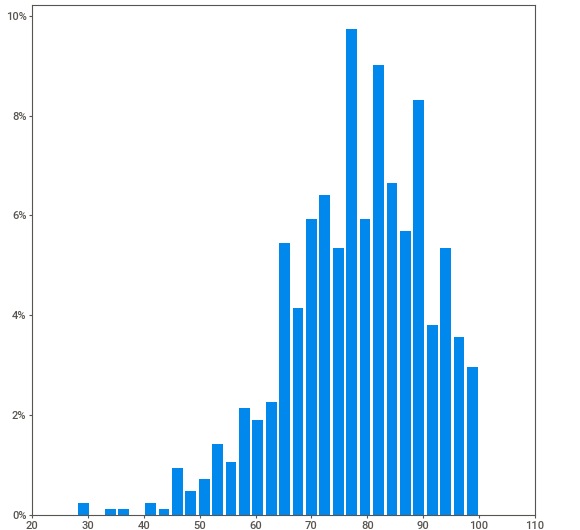
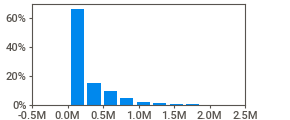
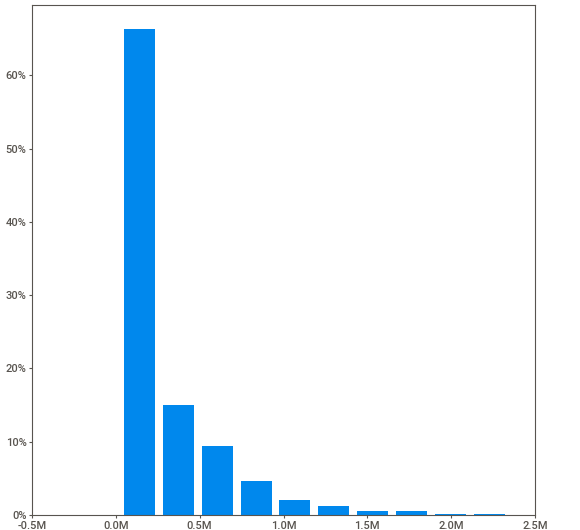
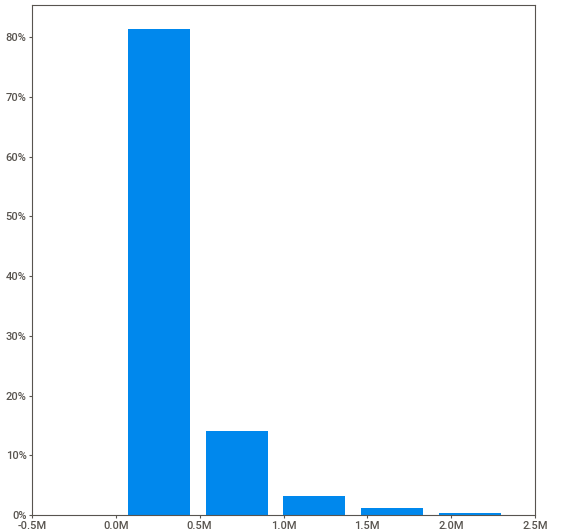
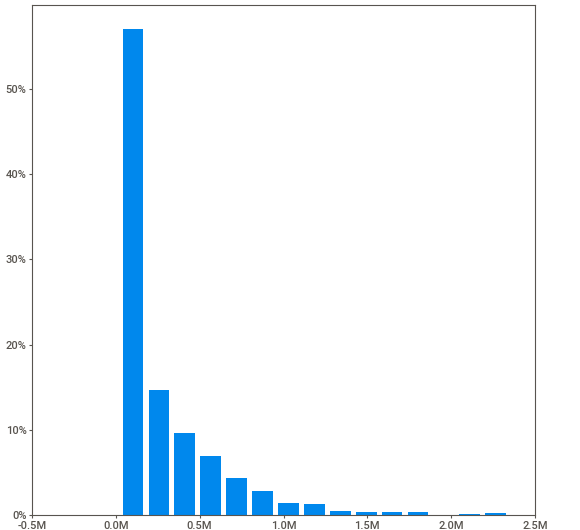
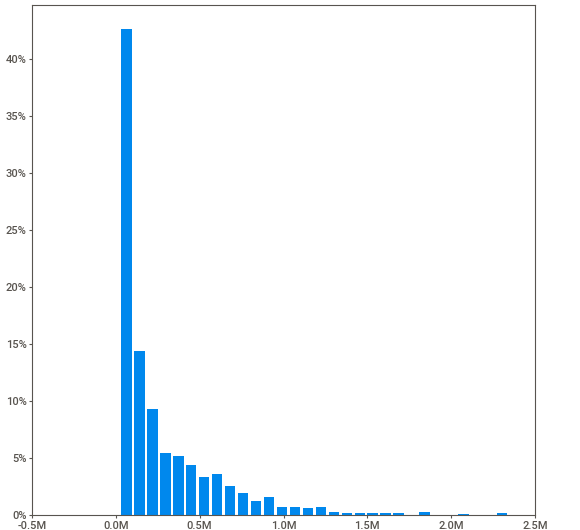
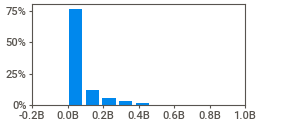
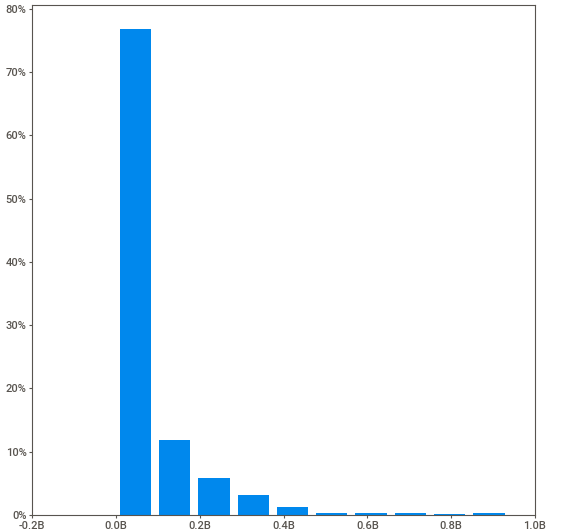
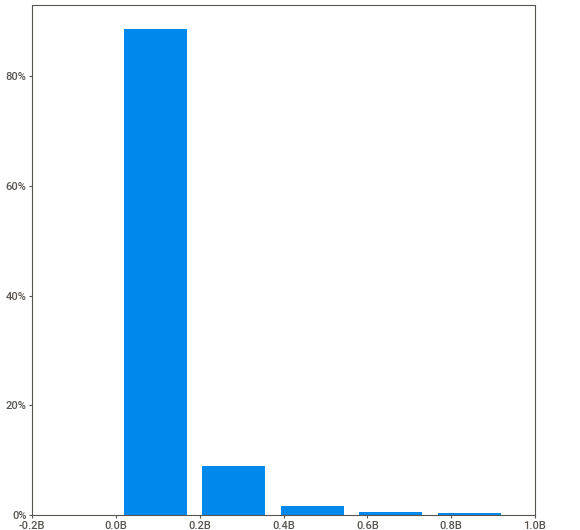
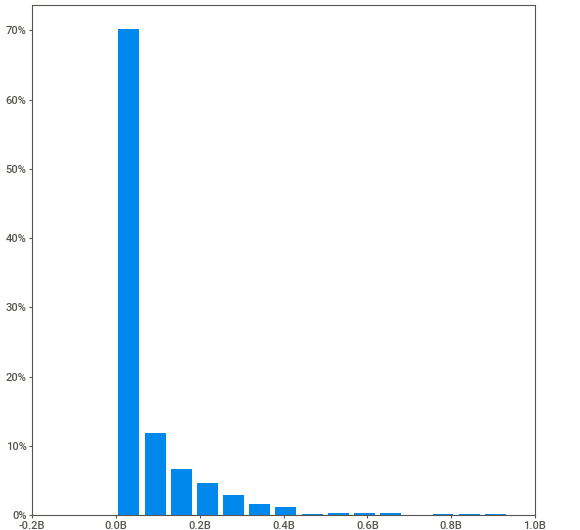
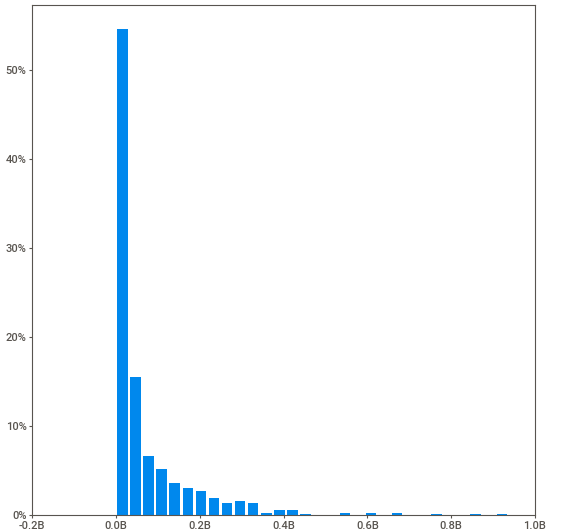
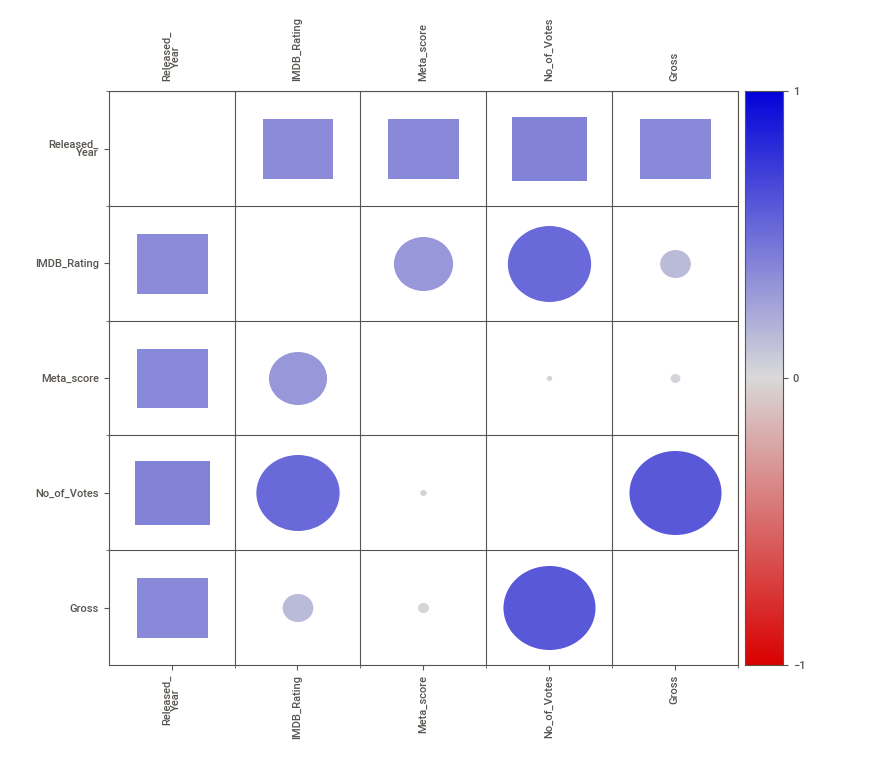
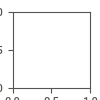

FileNotFoundError: [Errno 2] No such file or directory: './Report/sweetviz_report.html'

In [45]:
#Method 2 to generate data profile
report = sweetviz.analyze(imdb_top_1000)
report.show_notebook(w=None, h=None,
scale=None,
layout='vertical',
filepath='./Report/sweetviz_report.html')